In [54]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.options.display.width = 1000

In [55]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others_plus_MGC_remove.csv")
DPP_DTT_df = DPP_DTT_df.drop(labels = 'blend_conjugated_polymer', axis = 1)
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,solvent_boiling_point,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent
0,4.00,299.00,3.32,0.110000,1,1,132.0,0,0,0
1,4.00,299.00,3.32,0.290000,1,1,132.0,0,1,0
2,4.00,299.00,3.32,0.230000,1,1,132.0,0,1,0
3,4.00,299.00,3.32,0.730000,1,1,132.0,0,1,0
4,4.00,299.00,3.32,1.860000,1,1,132.0,0,1,0
5,4.00,299.00,3.32,0.210000,1,1,132.0,0,1,0
6,4.00,299.00,3.32,0.340000,1,1,132.0,0,1,0
7,4.00,299.00,3.32,0.240000,1,1,132.0,0,1,0
8,4.00,299.00,3.32,1.970000,1,1,132.0,0,1,0
9,4.00,299.00,3.32,0.690000,1,1,132.0,0,1,0


In [56]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'solvent_boiling_point',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent']

In [57]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPP_DTT_X = DPP_DTT_X.drop(labels = 'film_deposition_type_spin', axis = 1)

## multicollinieary check

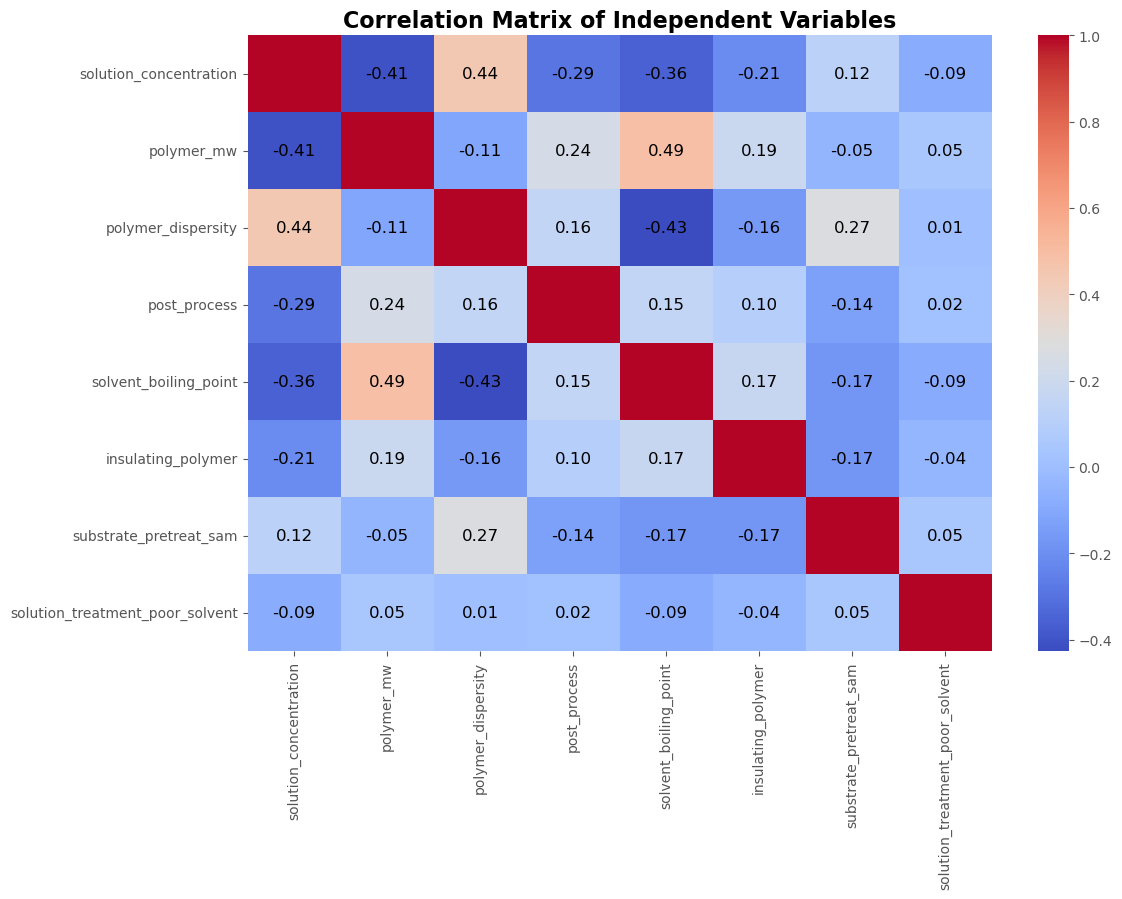

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the correlation matrix
correlation_matrix = DPP_DTT_X.corr()

# Check for NaN values and fill them with zeros
if correlation_matrix.isna().sum().sum() > 0:
    correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=False, 
                      fmt=".2f", 
                      cmap="coolwarm", 
                      cbar=True)

# Annotate only the non-zero and non-NaN correlations
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        # Only annotate non-diagonal, non-zero, non-NaN values
        if i != j and not np.isnan(corr_value) and corr_value != 0:
            heatmap.text(j + 0.5, i + 0.5, 
                         f"{corr_value:.2f}", 
                         ha='center', 
                         va='center', 
                         color='black', 
                         fontsize=12, 
                         )

plt.title("Correlation Matrix of Independent Variables", fontsize=16, fontweight='bold')
plt.show()


## w/o strandardscale

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Linear regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.499
R² score for test set: 0.278


## Polynomial regression

Degree 1: R² train = 0.499, R² test = 0.278
Degree 2: R² train = 0.799, R² test = 0.497
Degree 3: R² train = 0.797, R² test = -6347362891.333
Degree 4: R² train = 0.798, R² test = -6906316522225.127
Degree 5: R² train = 0.799, R² test = -39432013867117.828
Degree 6: R² train = 0.799, R² test = -978037433643.468


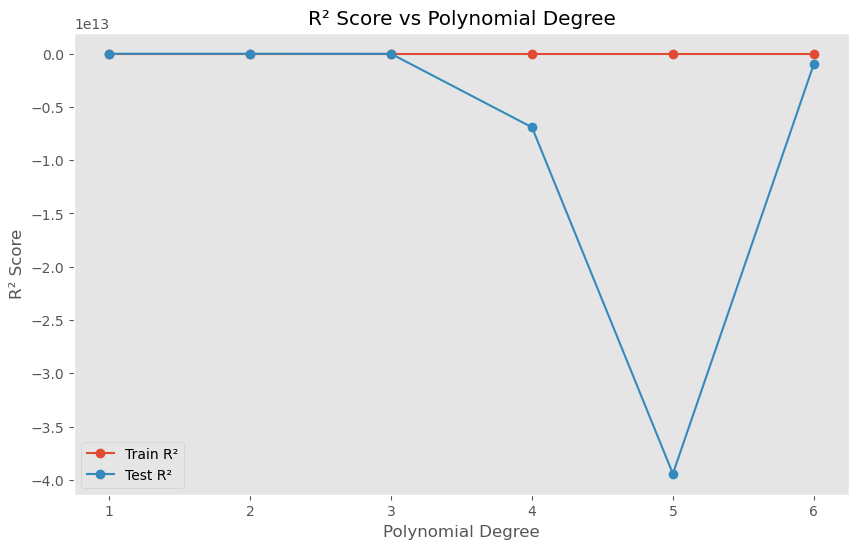

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Ridge regression

Alpha 0.1: R² train = 0.499, R² test = 0.279
Alpha 0.2: R² train = 0.499, R² test = 0.280
Alpha 0.3: R² train = 0.499, R² test = 0.281
Alpha 0.4: R² train = 0.499, R² test = 0.281
Alpha 0.5: R² train = 0.498, R² test = 0.282
Alpha 0.6: R² train = 0.498, R² test = 0.282
Alpha 0.7: R² train = 0.498, R² test = 0.282
Alpha 0.8: R² train = 0.498, R² test = 0.282
Alpha 0.9: R² train = 0.498, R² test = 0.282
Alpha 1.0: R² train = 0.497, R² test = 0.282


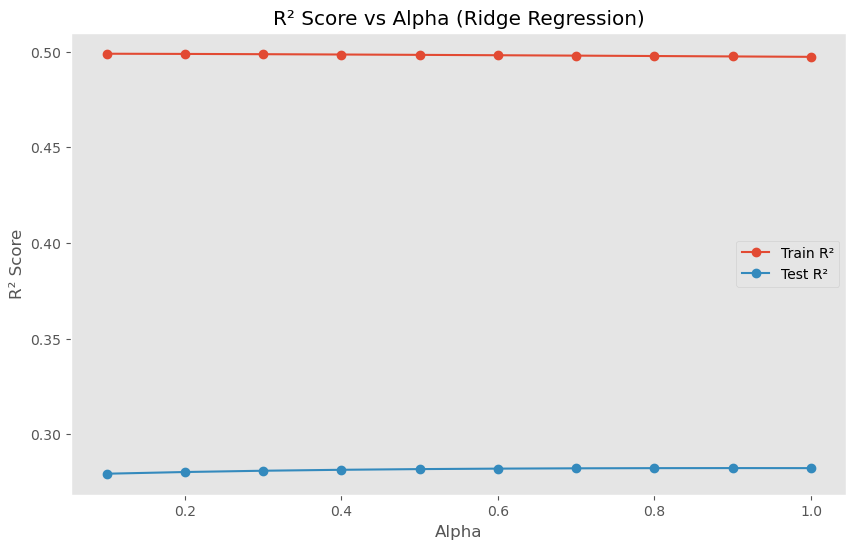

In [9]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Lasso regression

Alpha 0.1: R² train = 0.442, R² test = 0.167
Alpha 0.2: R² train = 0.423, R² test = 0.115
Alpha 0.3: R² train = 0.410, R² test = 0.079
Alpha 0.4: R² train = 0.391, R² test = 0.025
Alpha 0.5: R² train = 0.366, R² test = -0.044
Alpha 0.6: R² train = 0.352, R² test = -0.079
Alpha 0.7: R² train = 0.350, R² test = -0.076
Alpha 0.8: R² train = 0.348, R² test = -0.074
Alpha 0.9: R² train = 0.347, R² test = -0.072
Alpha 1.0: R² train = 0.347, R² test = -0.072


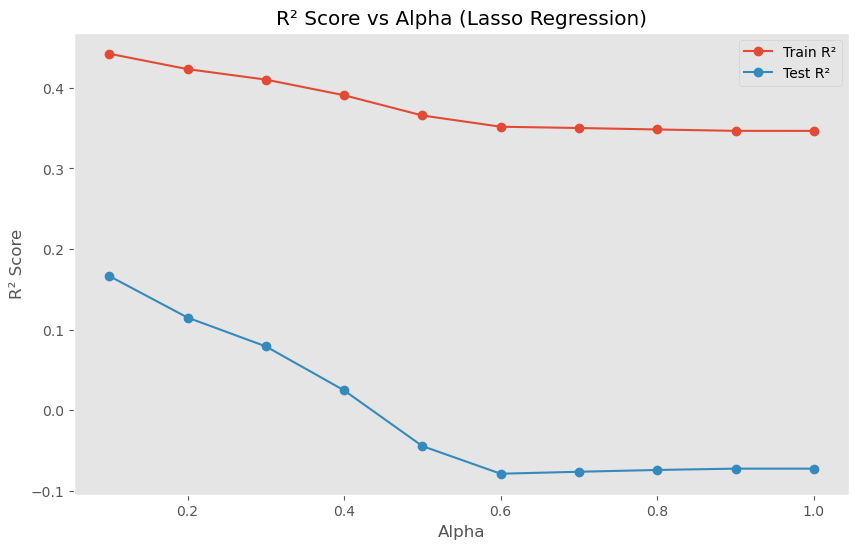

In [10]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Elsaticnet regression

In [11]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.475120  0.245273
1     0.1       0.2  0.472104  0.238212
2     0.1       0.3  0.468428  0.229955
3     0.1       0.4  0.463888  0.220210
4     0.1       0.5  0.458183  0.208578
5     0.1       0.6  0.453782  0.196734
6     0.1       0.7  0.449759  0.183697
7     0.1       0.8  0.447246  0.177452
8     0.1       0.9  0.444966  0.172574
9     0.1       1.0  0.442262  0.166527
10    0.2       0.1  0.460066  0.210139
11    0.2       0.2  0.453080  0.194035
12    0.2       0.3  0.445787  0.175511
13    0.2       0.4  0.440446  0.160145
14    0.2       0.5  0.436367  0.150609
15    0.2       0.6  0.431260  0.137974
16    0.2       0.7  0.426696  0.125989
17    0.2       0.8  0.425634  0.122594
18    0.2       0.9  0.424454  0.118944
19    0.2       1.0  0.423145  0.114988
20    0.3       0.1  0.448947  0.181926
21    0.3       0.2  0.440061  0.159830
22    0.3       0.3  0.433988  0.143679
23    0.3       0.4  0.427830  0.127884


## Support Vector Regression (SVR)

In [12]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

    C  epsilon  r2_train   r2_test
0   1      0.1  0.490365  0.130883
1   1      0.2  0.499451  0.172285
2   1      0.3  0.496233  0.188444
3   1      0.4  0.489567  0.187986
4   1      0.5  0.504126  0.201333
5   1      0.6  0.509491  0.156475
6   1      0.7  0.510888  0.131737
7   1      0.8  0.506110  0.092633
8   1      0.9  0.495724  0.050200
9   1      1.0  0.479924 -0.010080
10  1      1.1  0.455354 -0.071234
11  2      0.1  0.547466  0.031563
12  2      0.2  0.564095  0.032599
13  2      0.3  0.569143  0.019034
14  2      0.4  0.576726  0.033722
15  2      0.5  0.573454  0.049932
16  2      0.6  0.578861  0.077704
17  2      0.7  0.580751  0.081795
18  2      0.8  0.577598  0.045524
19  2      0.9  0.570614 -0.000114
20  2      1.0  0.561295 -0.051233
21  2      1.1  0.533157 -0.138350
22  3      0.1  0.574216 -0.034508
23  3      0.2  0.575773 -0.007563
24  3      0.3  0.584262  0.028837
25  3      0.4  0.581652  0.046033
26  3      0.5  0.585659  0.054638
27  3      0.6  0.59

## Decision tree regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.799
R² score for test set: 0.529


## Random forest regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
1            110  0.798674  0.542542
18           280  0.798567  0.535239
25           350  0.798622  0.535105
26           360  0.798616  0.534766
24           340  0.798599  0.533835
0            100  0.798670  0.533686
20           300  0.798637  0.533602
21           310  0.798669  0.533246
27           370  0.798651  0.533150
2            120  0.798701  0.532707


## Gradient bossting regression

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
47             100            0.4          3  0.799477  0.532393
497            130            0.4          3  0.799480  0.532266
347            120            0.4          3  0.799480  0.532257
647            140            0.4          3  0.799481  0.532238
1697           210            0.4          3  0.799482  0.532197
2597           270            0.4          3  0.799482  0.532191
1097           170            0.4          3  0.799481  0.532190
1247           180            0.4          3  0.799482  0.532177
2897           290            0.4          3  0.799482  0.532176
1397           190            0.4          3  0.799482  0.532175


## K-nearest Neighbors Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
15           16  0.590544  0.489892
13           14  0.633909  0.485595
14           15  0.616643  0.484820
12           13  0.658390  0.464457
0             1  0.548934  0.454310
11           12  0.681509  0.426696
10           11  0.694497  0.384798
1             2  0.767180  0.359389
9            10  0.706403  0.290089
2             3  0.782814  0.259283


## XGB regression

In [17]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
802            150            0.1          3  0.799298  0.532051
322            120            0.1          3  0.799187  0.531999
1282           180            0.1          3  0.799355  0.531974
498            130            0.2          3  0.799424  0.531919
1778           210            0.2          3  0.799468  0.531889
1122           170            0.1          3  0.799344  0.531885
1138           170            0.2          3  0.799460  0.531878
978            160            0.2          3  0.799457  0.531867
1618           200            0.2          3  0.799468  0.531863
2578           260            0.2          3  0.799475  0.531836


## Adaboost regression

In [18]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
112           210            0.3  0.765781  0.754739
182           280            0.3  0.765781  0.754739
142           240            0.3  0.765781  0.754739
52            150            0.3  0.765781  0.754739
132           230            0.3  0.765781  0.754739
152           250            0.3  0.765781  0.754739
92            190            0.3  0.765781  0.754739
22            120            0.3  0.765781  0.754739
82            180            0.3  0.765781  0.754739
162           260            0.3  0.765781  0.754739


## K-fold validation with Adabossting regression

In [19]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.818935     0.683162
1   3      0.771374     0.763106
2   4      0.778688     0.764217
3   5      0.772293     0.744184
4   6      0.771519     0.691446
5   7      0.770585     0.686568
6   8      0.771647     0.722147
7   9      0.770142     0.668673
8  10      0.769165     0.510300


## Important x values from adaboosting regresion

In [20]:
# Example dataset (replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.667174
4            solvent_boiling_point    0.173126
5               insulating_polymer    0.112700
2               polymer_dispersity    0.035243
0           solution_concentration    0.011648
6           substrate_pretreat_sam    0.000079
3                     post_process    0.000029
7  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## w/ Stnadard scaler only X

In [60]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [61]:
print(X_train.mean())
print(X_train.std())
print(X_test.mean())
print(X_test.std())
print(y_train.mean())
print(y_train.std())
print(y_test.mean())
print(y_test.std())

-1.6207635395987685e-17
1.0
-0.16672953951167133
1.2754914131328219
2.5932216633580298e-17
1.0
-0.05667209044723291
0.9309513460556815


## Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.499
R² score for test set: 0.278


## Polynomial regression

Degree 1: R² train = 0.499, R² test = 0.278
Degree 2: R² train = 0.799, R² test = 0.497
Degree 3: R² train = 0.799, R² test = -97304730824457024.000
Degree 4: R² train = 0.799, R² test = -336993288330405248.000
Degree 5: R² train = 0.799, R² test = -63499053885.011
Degree 6: R² train = 0.799, R² test = -355572550.403


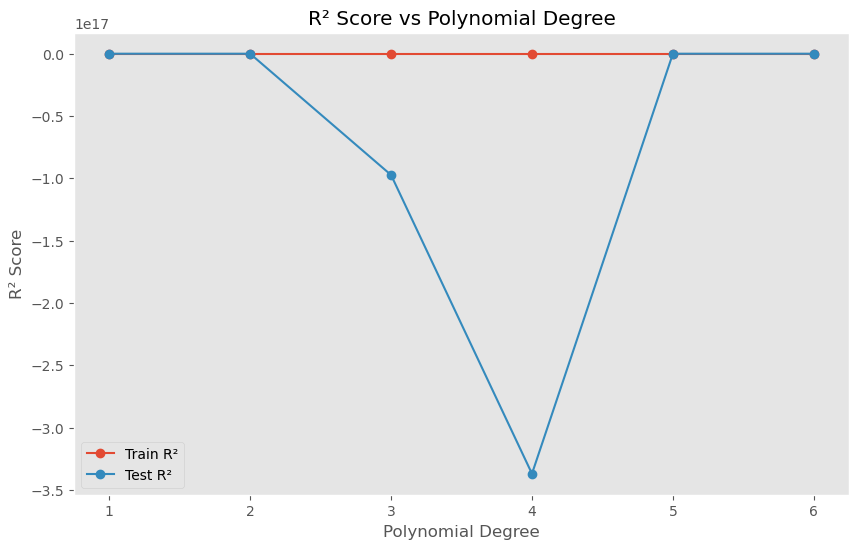

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Ridge regression

Alpha 0.1: R² train = 0.499, R² test = 0.279
Alpha 0.2: R² train = 0.499, R² test = 0.279
Alpha 0.3: R² train = 0.499, R² test = 0.279
Alpha 0.4: R² train = 0.499, R² test = 0.280
Alpha 0.5: R² train = 0.499, R² test = 0.280
Alpha 0.6: R² train = 0.499, R² test = 0.281
Alpha 0.7: R² train = 0.499, R² test = 0.281
Alpha 0.8: R² train = 0.499, R² test = 0.281
Alpha 0.9: R² train = 0.499, R² test = 0.282
Alpha 1.0: R² train = 0.499, R² test = 0.282


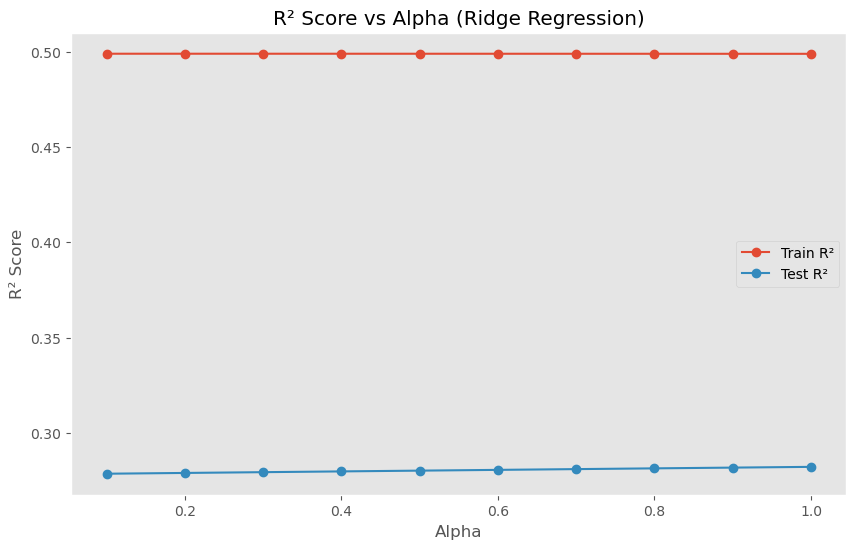

In [25]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Lasso regression

Alpha 0.1: R² train = 0.468, R² test = 0.257
Alpha 0.2: R² train = 0.415, R² test = 0.188
Alpha 0.3: R² train = 0.359, R² test = 0.117
Alpha 0.4: R² train = 0.315, R² test = 0.112
Alpha 0.5: R² train = 0.274, R² test = 0.109
Alpha 0.6: R² train = 0.243, R² test = 0.114
Alpha 0.7: R² train = 0.205, R² test = 0.106
Alpha 0.8: R² train = 0.163, R² test = 0.088
Alpha 0.9: R² train = 0.114, R² test = 0.057
Alpha 1.0: R² train = 0.060, R² test = 0.014


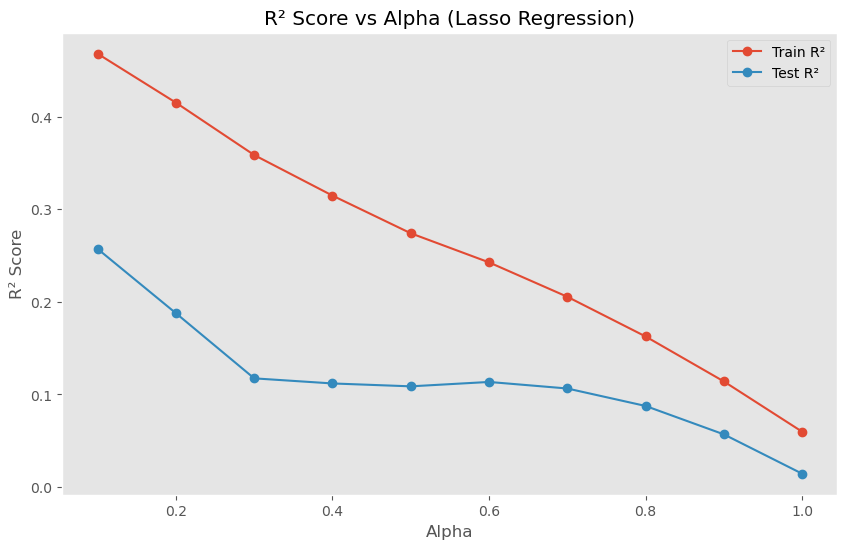

In [26]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Elsaticnet regression

In [27]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.492628  0.312474
1     0.1       0.2  0.491174  0.308853
2     0.1       0.3  0.489381  0.304598
3     0.1       0.4  0.487208  0.299626
4     0.1       0.5  0.484614  0.293833
5     0.1       0.6  0.481544  0.287117
6     0.1       0.7  0.477940  0.279334
7     0.1       0.8  0.474147  0.271086
8     0.1       0.9  0.471195  0.264425
9     0.1       1.0  0.467881  0.257159
10    0.2       0.1  0.479062  0.329276
11    0.2       0.2  0.474167  0.320704
12    0.2       0.3  0.467954  0.309968
13    0.2       0.4  0.460206  0.296629
14    0.2       0.5  0.453349  0.284660
15    0.2       0.6  0.445889  0.269494
16    0.2       0.7  0.437757  0.251843
17    0.2       0.8  0.431341  0.233626
18    0.2       0.9  0.423833  0.212439
19    0.2       1.0  0.415046  0.187742
20    0.3       0.1  0.462397  0.335582
21    0.3       0.2  0.452916  0.321196
22    0.3       0.3  0.441276  0.303460
23    0.3       0.4  0.430139  0.283693


## Support Vector Regression (SVR)

In [28]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

    C  epsilon  r2_train   r2_test
0   1      0.1  0.671134  0.608039
1   1      0.2  0.670814  0.578370
2   1      0.3  0.664358  0.594056
3   1      0.4  0.654612  0.599755
4   1      0.5  0.643259  0.597650
5   1      0.6  0.627770  0.584435
6   1      0.7  0.626891  0.549449
7   1      0.8  0.609701  0.484182
8   1      0.9  0.581271  0.416668
9   1      1.0  0.565864  0.350094
10  1      1.1  0.544676  0.269764
11  2      0.1  0.722538  0.593265
12  2      0.2  0.728764  0.571271
13  2      0.3  0.736765  0.580652
14  2      0.4  0.731826  0.553056
15  2      0.5  0.732412  0.520798
16  2      0.6  0.731473  0.470732
17  2      0.7  0.721413  0.463348
18  2      0.8  0.704458  0.397185
19  2      0.9  0.687931  0.328651
20  2      1.0  0.669291  0.254977
21  2      1.1  0.644821  0.166988
22  3      0.1  0.773708  0.439735
23  3      0.2  0.766850  0.447219
24  3      0.3  0.766064  0.482499
25  3      0.4  0.762197  0.508862
26  3      0.5  0.755703  0.518021
27  3      0.6  0.74

## Decision tree regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.799
R² score for test set: 0.529


## Random forest regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
1            110  0.798677  0.541960
25           350  0.798624  0.534892
18           280  0.798569  0.534883
26           360  0.798619  0.534564
24           340  0.798602  0.533576
20           300  0.798640  0.533340
21           310  0.798672  0.533055
0            100  0.798672  0.533029
27           370  0.798653  0.532997
2            120  0.798703  0.532304


## Gradient bossting regression

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
47             100            0.4          3  0.799477  0.532300
947            160            0.4          3  0.799481  0.532273
2147           240            0.4          3  0.799482  0.532271
497            130            0.4          3  0.799480  0.532264
647            140            0.4          3  0.799481  0.532207
3197           310            0.4          3  0.799482  0.532197
2297           250            0.4          3  0.799482  0.532188
1547           200            0.4          3  0.799482  0.532177
1397           190            0.4          3  0.799482  0.532176
2897           290            0.4          3  0.799482  0.532176


## K-nearest Neighbors Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
0             1  0.559611  0.920118
1             2  0.746339  0.805416
5             6  0.777537  0.675200
6             7  0.780506  0.534092
2             3  0.784481  0.514976
4             5  0.790887  0.446166
11           12  0.630409  0.439907
7             8  0.767884  0.433555
13           14  0.570555  0.428127
15           16  0.538928  0.427953


                           Feature  Importance
1                       polymer_mw    1.188025
2               polymer_dispersity    0.420553
3                     post_process    0.075266
6           substrate_pretreat_sam    0.054626
0           solution_concentration    0.039647
4            solvent_boiling_point    0.027107
5               insulating_polymer    0.012466
7  solution_treatment_poor_solvent    0.000000


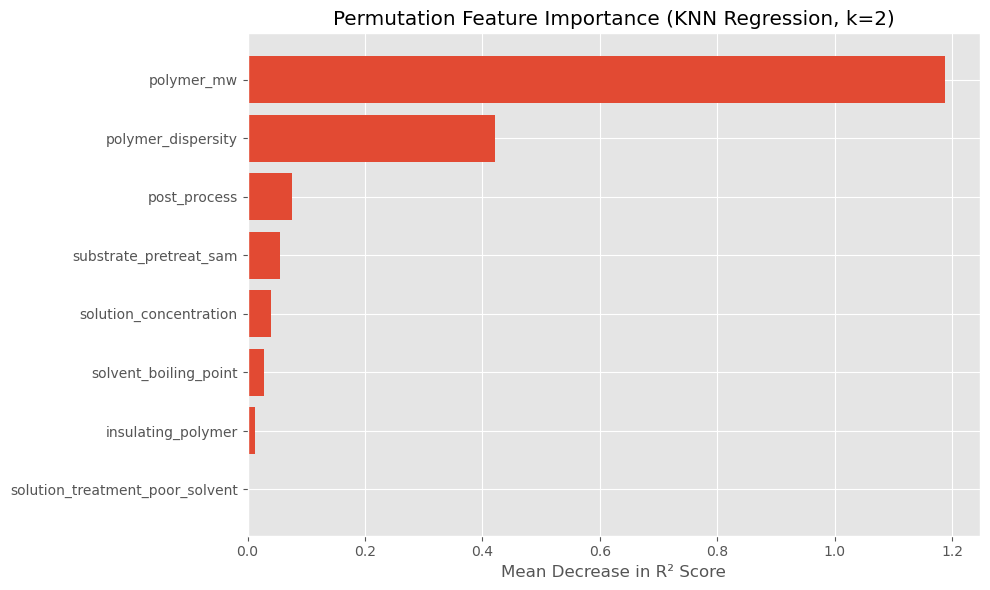

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train KNN model
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Compute permutation feature importance on the test set
result = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=30, random_state=42, n_jobs=-1)

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': result.importances_mean
}).sort_values(by="Importance", ascending=False)

# Display
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease in R² Score")
plt.title("Permutation Feature Importance (KNN Regression, k=2)")
plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10

# List to store results
results = []

# Iterate over different K values
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_r2_scores = []
    test_r2_scores = []
    
    # Define KNN model
    model = KNeighborsRegressor(n_neighbors=2)

    # Train and predict
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    # R² evaluation
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
        
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    # Store results for each K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("K-Fold Cross-Validation Results (KNN Regression, n_neighbors=2):")
print(results_df)


K-Fold Cross-Validation Results (KNN Regression, n_neighbors=2):
    K  Avg Train R²  Avg Test R²
0   2      0.709618      0.98555
1   3      0.709618      0.98555
2   4      0.709618      0.98555
3   5      0.709618      0.98555
4   6      0.709618      0.98555
5   7      0.709618      0.98555
6   8      0.709618      0.98555
7   9      0.709618      0.98555
8  10      0.709618      0.98555


## XGBregression

In [33]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
802            150            0.1          3  0.799298  0.532051
322            120            0.1          3  0.799187  0.531999
1282           180            0.1          3  0.799355  0.531974
498            130            0.2          3  0.799424  0.531919
1778           210            0.2          3  0.799468  0.531889
1122           170            0.1          3  0.799344  0.531885
1138           170            0.2          3  0.799460  0.531878
978            160            0.2          3  0.799457  0.531867
1618           200            0.2          3  0.799468  0.531863
2578           260            0.2          3  0.799475  0.531836


## Adaboost regression

In [34]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
112           210            0.3  0.765781  0.754739
182           280            0.3  0.765781  0.754739
142           240            0.3  0.765781  0.754739
52            150            0.3  0.765781  0.754739
132           230            0.3  0.765781  0.754739
152           250            0.3  0.765781  0.754739
92            190            0.3  0.765781  0.754739
22            120            0.3  0.765781  0.754739
82            180            0.3  0.765781  0.754739
162           260            0.3  0.765781  0.754739


## K-fold validation with adaboosting regression

In [35]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.818935     0.683162
1   3      0.771374     0.763106
2   4      0.778688     0.764217
3   5      0.772261     0.744181
4   6      0.771519     0.691446
5   7      0.770585     0.686568
6   8      0.771647     0.722147
7   9      0.769952     0.674980
8  10      0.769165     0.510300


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-fold validation with SVR regression

In [36]:
# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the SVR Model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the SVR model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results with SVR:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results with SVR:
    K  Avg Train R²  Avg Test R²
0   2      0.509208     0.491492
1   3      0.576975     0.562544
2   4      0.609382     0.538608
3   5      0.598368     0.522740
4   6      0.614655     0.580763
5   7      0.624736     0.591636
6   8      0.624695     0.600182
7   9      0.621756     0.595944
8  10      0.621159     0.260714


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## Important x values from adaboosting regresion

In [37]:
# Example dataset (replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.667174
4            solvent_boiling_point    0.173126
5               insulating_polymer    0.112700
2               polymer_dispersity    0.035243
0           solution_concentration    0.011648
6           substrate_pretreat_sam    0.000079
3                     post_process    0.000029
7  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Important x values from SVR regresion

In [38]:
# Import necessary libraries
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialize and train the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance (Descending Order):
                           Feature  Importance
5               insulating_polymer    0.354004
4            solvent_boiling_point    0.336369
1                       polymer_mw    0.314312
2               polymer_dispersity    0.237802
6           substrate_pretreat_sam    0.065487
0           solution_concentration    0.019537
3                     post_process    0.000000
7  solution_treatment_poor_solvent    0.000000


## w/ Stnadard scaler X and y

In [39]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.499
R² score for test set: 0.278


## Polynomial regerssion

Degree 1: R² train = 0.499, R² test = 0.278
Degree 2: R² train = 0.799, R² test = 0.497
Degree 3: R² train = 0.799, R² test = -16955293930597736.000
Degree 4: R² train = 0.799, R² test = -18329274917505216.000
Degree 5: R² train = 0.799, R² test = -1114212141814.946
Degree 6: R² train = 0.799, R² test = -5442220671.058


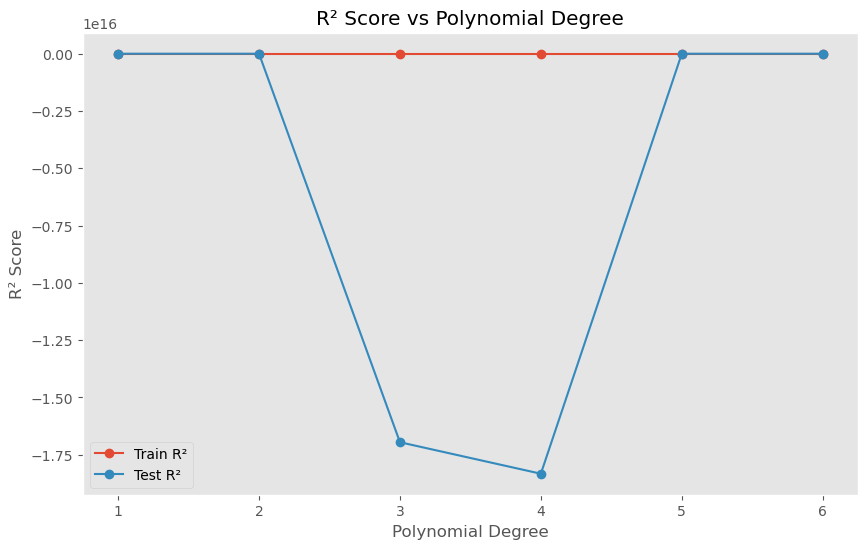

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()

## Ridge regression

Alpha 0.1: R² train = 0.499, R² test = 0.279
Alpha 0.2: R² train = 0.499, R² test = 0.279
Alpha 0.3: R² train = 0.499, R² test = 0.279
Alpha 0.4: R² train = 0.499, R² test = 0.280
Alpha 0.5: R² train = 0.499, R² test = 0.280
Alpha 0.6: R² train = 0.499, R² test = 0.281
Alpha 0.7: R² train = 0.499, R² test = 0.281
Alpha 0.8: R² train = 0.499, R² test = 0.281
Alpha 0.9: R² train = 0.499, R² test = 0.282
Alpha 1.0: R² train = 0.499, R² test = 0.282


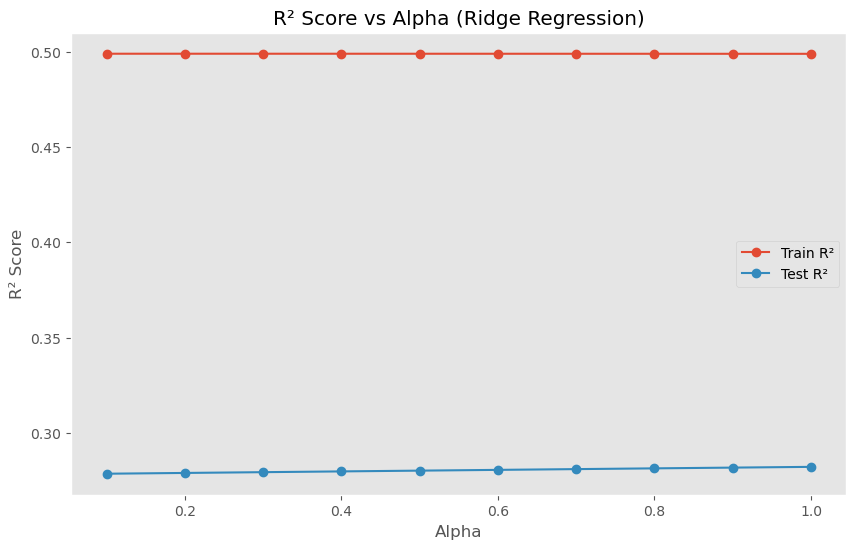

In [42]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Lasso regression

Alpha 0.1: R² train = 0.422, R² test = 0.199
Alpha 0.2: R² train = 0.327, R² test = 0.114
Alpha 0.3: R² train = 0.255, R² test = 0.113
Alpha 0.4: R² train = 0.185, R² test = 0.099
Alpha 0.5: R² train = 0.095, R² test = 0.043
Alpha 0.6: R² train = 0.000, R² test = -0.040
Alpha 0.7: R² train = 0.000, R² test = -0.040
Alpha 0.8: R² train = 0.000, R² test = -0.040
Alpha 0.9: R² train = 0.000, R² test = -0.040
Alpha 1.0: R² train = 0.000, R² test = -0.040


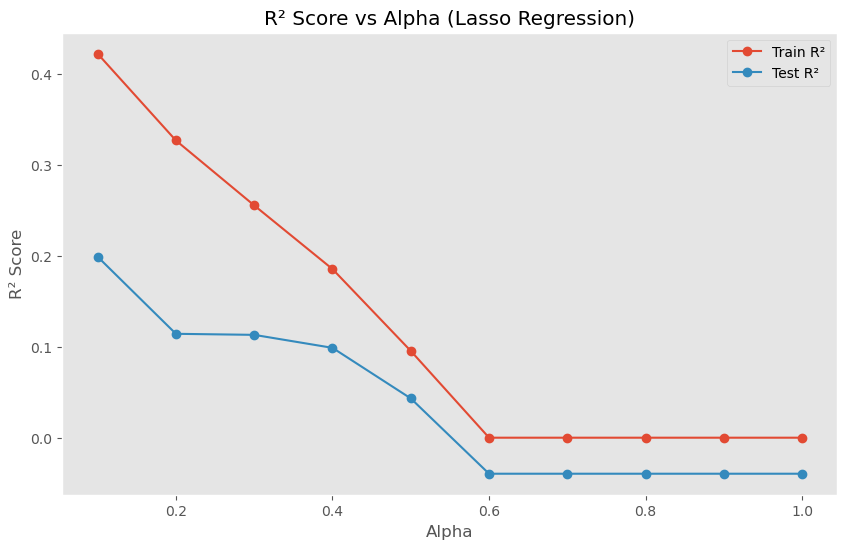

In [43]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Elasticnet regression

In [44]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.490467  0.311675
1     0.1       0.2  0.485762  0.305645
2     0.1       0.3  0.479507  0.297166
3     0.1       0.4  0.471528  0.285912
4     0.1       0.5  0.464111  0.275949
5     0.1       0.6  0.456046  0.264762
6     0.1       0.7  0.447363  0.250150
7     0.1       0.8  0.438319  0.234149
8     0.1       0.9  0.430796  0.217686
9     0.1       1.0  0.422261  0.198996
10    0.2       0.1  0.472399  0.324352
11    0.2       0.2  0.457174  0.305712
12    0.2       0.3  0.440614  0.284144
13    0.2       0.4  0.425733  0.258515
14    0.2       0.5  0.409973  0.228652
15    0.2       0.6  0.390857  0.191978
16    0.2       0.7  0.370113  0.153563
17    0.2       0.8  0.351806  0.124822
18    0.2       0.9  0.339401  0.118230
19    0.2       1.0  0.326864  0.114246
20    0.3       0.1  0.450290  0.324898
21    0.3       0.2  0.424918  0.293012
22    0.3       0.3  0.404051  0.257434
23    0.3       0.4  0.377281  0.210523


## Support Vector Regression (SVR)

In [45]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

    C  epsilon  r2_train   r2_test
0   1      0.1  0.718859  0.583187
1   1      0.2  0.729683  0.570608
2   1      0.3  0.728304  0.513443
3   1      0.4  0.712247  0.446370
4   1      0.5  0.671819  0.325275
5   1      0.6  0.629257  0.168212
6   1      0.7  0.566673 -0.036794
7   1      0.8  0.467402 -0.239574
8   1      0.9  0.333900 -0.519126
9   1      1.0  0.188660 -0.818797
10  1      1.1  0.037073 -1.174151
11  2      0.1  0.780590  0.490179
12  2      0.2  0.771167  0.485492
13  2      0.3  0.751277  0.300755
14  2      0.4  0.730937  0.238756
15  2      0.5  0.703906  0.230199
16  2      0.6  0.656590  0.151055
17  2      0.7  0.585318 -0.028998
18  2      0.8  0.500952 -0.248901
19  2      0.9  0.385527 -0.486836
20  2      1.0  0.238533 -0.803370
21  2      1.1  0.067059 -1.173329
22  3      0.1  0.783876  0.407476
23  3      0.2  0.772752  0.343069
24  3      0.3  0.759729  0.274943
25  3      0.4  0.743809  0.290363
26  3      0.5  0.711039  0.261813
27  3      0.6  0.65

## Deicision tree regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.799
R² score for test set: 0.531


## Random forest regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
1            110  0.798724  0.542898
18           280  0.798790  0.535356
25           350  0.798763  0.535169
26           360  0.798714  0.534835
0            100  0.798734  0.534012
24           340  0.798749  0.533877
20           300  0.798825  0.533660
21           310  0.798798  0.533362
27           370  0.798738  0.533198
2            120  0.798746  0.533022


## Gradient boosting regression

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
47             100            0.4          3  0.799477  0.532392
647            140            0.4          3  0.799481  0.532202
2297           250            0.4          3  0.799482  0.532190
2747           280            0.4          3  0.799482  0.532172
1847           220            0.4          3  0.799482  0.532172
197            110            0.4          3  0.799478  0.532170
1997           230            0.4          3  0.799482  0.532087
2447           260            0.4          3  0.799482  0.532022
2795           280            0.7          6  0.799482  0.531957
695            140            0.7          6  0.799482  0.531953


## K-nearest Neighbors Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
0             1  0.559611  0.920118
1             2  0.746335  0.805536
5             6  0.777521  0.675279
6             7  0.780487  0.534096
2             3  0.784494  0.514737
4             5  0.790888  0.446206
11           12  0.630432  0.439860
7             8  0.767878  0.433507
13           14  0.570572  0.428102
15           16  0.538944  0.427919


## XGBregression

In [50]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
802            150            0.1          3  0.799300  0.532132
642            140            0.1          3  0.799277  0.532103
1618           200            0.2          3  0.799467  0.532006
322            120            0.1          3  0.799187  0.532000
1458           190            0.2          3  0.799466  0.531985
1282           180            0.1          3  0.799356  0.531924
498            130            0.2          3  0.799424  0.531919
1442           190            0.1          3  0.799369  0.531911
1602           200            0.1          3  0.799382  0.531899
3202           300            0.1          3  0.799442  0.531891


## Adaboost regression

In [51]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
112           210            0.3  0.765779  0.754712
182           280            0.3  0.765779  0.754712
142           240            0.3  0.765779  0.754712
52            150            0.3  0.765779  0.754712
132           230            0.3  0.765779  0.754712
152           250            0.3  0.765779  0.754712
92            190            0.3  0.765779  0.754712
22            120            0.3  0.765779  0.754712
82            180            0.3  0.765779  0.754712
162           260            0.3  0.765779  0.754712


## K-fold validation with Adaboost regression

In [53]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=210,
        learning_rate=0.3,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = scaler_y.fit_transform(DPP_DTT_Y.iloc[train_index]), scaler_y.transform(DPP_DTT_Y.iloc[test_index])
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.816261     0.639981
1   3      0.777331     0.781058
2   4      0.778063     0.759197
3   5      0.771036     0.746924
4   6      0.768316     0.689829
5   7      0.770223     0.696127
6   8      0.772767     0.728761
7   9      0.772215     0.655865
8  10      0.771347     0.505903


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
